In [1]:
import numpy as np 
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt 
import sys
sys.path.append("../modules")
sys.path.append("../data")
import matrix
import import_data
from numpy.linalg import svd
N = 40
L = 41


In [2]:
path_b_int =  "../data/acc_b.csv"
acc_b_int = import_data.data(path_b_int)
acc_b_int = acc_b_int.values
num_sample = acc_b_int.shape[1]

path_b_d =  "../data/acc_b_0.8_20.csv"
acc_b_d = import_data.data(path_b_d)
acc_b_d = acc_b_d.values

acc_b_bounce_int = []
acc_b_bounce_d = []
#extract bounce
for i in range(int(acc_b_int.shape[0]/2)):
    #print(2*i)
    acc_b_bounce_int =np.append(acc_b_bounce_int,acc_b_int[2*i,:],axis=0) 
    acc_b_bounce_d =np.append(acc_b_bounce_d,acc_b_d[2*i,:],axis=0) 
acc_b_bounce_int = np.array(acc_b_bounce_int.reshape([N+1,num_sample]))
acc_b_bounce_d = np.array(acc_b_bounce_d.reshape([N+1,num_sample]))
#print(acc_b_bounce_int.shape[1])

<function matplotlib.pyplot.show(close=None, block=None)>

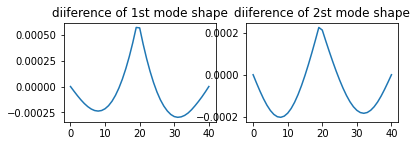

In [3]:
mode_int = matrix.mode_shape(acc_b_bounce_int)
mode_d = matrix.mode_shape(acc_b_bounce_d)
deff1 = mode_int[:,0].T-mode_d[:,0].T
deff2 = mode_int[:,1].T-mode_d[:,1].T
fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
#ax.set_xlabel("w(rad/s)")
#ax.set_ylabel("mode(m/s)")
ax1.plot(deff1)
ax1.set_title("diiference of 1st mode shape")
#ax1.plot(mode_d[:,0].T)
ax2.plot(deff2)
ax2.set_title("diiference of 2st mode shape")
#ax2.plot(mode_d[:,1].T)
plt.show




<function matplotlib.pyplot.show(close=None, block=None)>

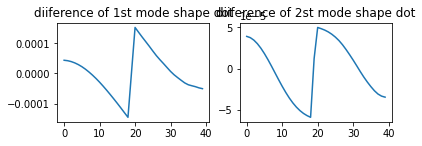

In [5]:
mode_int_dot = matrix.A(N,L)@mode_int
mode_d_dot = matrix.A(N,L)@mode_d
deff1_dot = mode_int_dot[:,0].T-mode_d_dot[:,0].T
deff2_dot = mode_int_dot[:,1].T-mode_d_dot[:,1].T
fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
#ax.set_xlabel("w(rad/s)")
#ax.set_ylabel("mode(m/s)")
ax1.plot(deff1_dot)
ax1.set_title("diiference of 1st mode shape dot")
#ax1.plot(mode_d[:,0].T)
ax2.plot(deff2_dot)
ax2.set_title("diiference of 2st mode shape dot")
#ax2.plot(mode_d[:,1].T)
plt.show


In [5]:
print(mode_d_dot[:,1])

[ 0.03450165  0.03366352  0.03200496  0.02956789  0.0264121   0.02261182
  0.01825769  0.01344584  0.00828264  0.00289727 -0.00257264 -0.00798007
 -0.01320218 -0.0181031  -0.02255818 -0.02645328 -0.02969513 -0.03220731
 -0.03392328 -0.03488607 -0.03496093 -0.03413886 -0.0324872  -0.03004065
 -0.02685765 -0.02300736 -0.01860799 -0.01375406 -0.00854865 -0.00312537
  0.00240458  0.00789869  0.01323522  0.01828253  0.02289068  0.02695537
  0.0303696   0.03299384  0.03477353  0.03566055]


In [6]:
print("RMS of 1st mode",abs(1-((sum(mode_d[:,0]**2)/sum(mode_int[:,0]**2))**0.5)))
print("RMS of 2st mode",abs(1-((sum(mode_d[:,1]**2)/sum(mode_int[:,1]**2))**0.5)))
print("RMS of 1st mode dot",abs(1-((sum(mode_d_dot[:,0]**2)/sum(mode_int_dot[:,0]**2))**0.5)))
print("RMS of 2st mode dot",abs(1-((sum(mode_d_dot[:,1]**2)/sum(mode_int_dot[:,1]**2))**0.5)))

RMS of 1st mode 2.220446049250313e-16
RMS of 2st mode 8.881784197001252e-16
RMS of 1st mode dot 8.880637361041721e-06
RMS of 2st mode dot 4.926689164852505e-06
